In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_rent = pd.read_csv('../../data/rent.csv', sep=';', encoding='utf-8')
df_rent

,list_id,type,specific_type,first_publication_date,zipcode,district_id,price,charges_included,furnished,surface,...,parking,building_year,security_deposit,energy_rate,greenhouse_rate,owner_type,owner_company,latitude,longitude,url
0,2935092355,Appartement,Autres,2025-02-11 20:55:23,75017,3000120.0,500,1,1.0,9.0,...,NaN,1900.0,940.0,v,v,private,NaN,48.884100,2.290130,https://www.leboncoin.fr/ad/locations/2935092355
1,2934896366,Appartement,RDC surélevé,2025-02-11 15:40:22,75018,100465.0,500,1,1.0,11.0,...,NaN,1940.0,940.0,d,v,private,NaN,48.887150,2.334070,https://www.leboncoin.fr/ad/locations/2934896366
2,2915917705,Appartement,NaN,2025-01-08 21:48:00,75019,100457.0,500,1,1.0,7.0,...,NaN,NaN,1056.0,b,b,pro,E2F IMMO,48.886256,2.370498,https://www.leboncoin.fr/ad/locations/2915917705
3,2930327536,Appartement,NaN,2025-02-03 09:13:00,75018,75118.0,500,1,1.0,10.0,...,NaN,NaN,940.0,d,d,pro,LocService,48.888351,2.359744,https://www.leboncoin.fr/ad/locations/2930327536
4,2933109540,Appartement,Appartement mansardé,2025-02-08 16:20:09,75011,3000219.0,500,1,1.0,9.0,...,NaN,1950.0,1000.0,NaN,NaN,private,NaN,48.868210,2.372550,https://www.leboncoin.fr/ad/locations/2933109540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,2915282484,Appartement,NaN,2025-01-07 19:54:12,75017,3000193.0,1500,1,1.0,30.0,...,0.0,1930.0,3000.0,d,d,private,NaN,48.885710,2.325020,https://www.leboncoin.fr/ad/locations/2915282484
1190,2915239385,Appartement,Autres,2025-01-07 18:36:38,75010,100517.0,1500,1,1.0,45.0,...,NaN,1900.0,3000.0,v,v,private,NaN,48.874090,2.347930,https://www.leboncoin.fr/ad/locations/2915239385
1191,2911754446,Appartement,NaN,2025-01-01 20:54:27,75018,100465.0,1500,1,1.0,27.0,...,NaN,NaN,NaN,d,NaN,private,NaN,48.887250,2.343220,https://www.leboncoin.fr/ad/locations/2911754446
1192,2908358055,Appartement,NaN,2024-12-25 16:02:00,75016,100478.0,1500,1,1.0,26.0,...,0.0,1970.0,2760.0,e,e,private,NaN,48.858030,2.274490,https://www.leboncoin.fr/ad/locations/2908358055


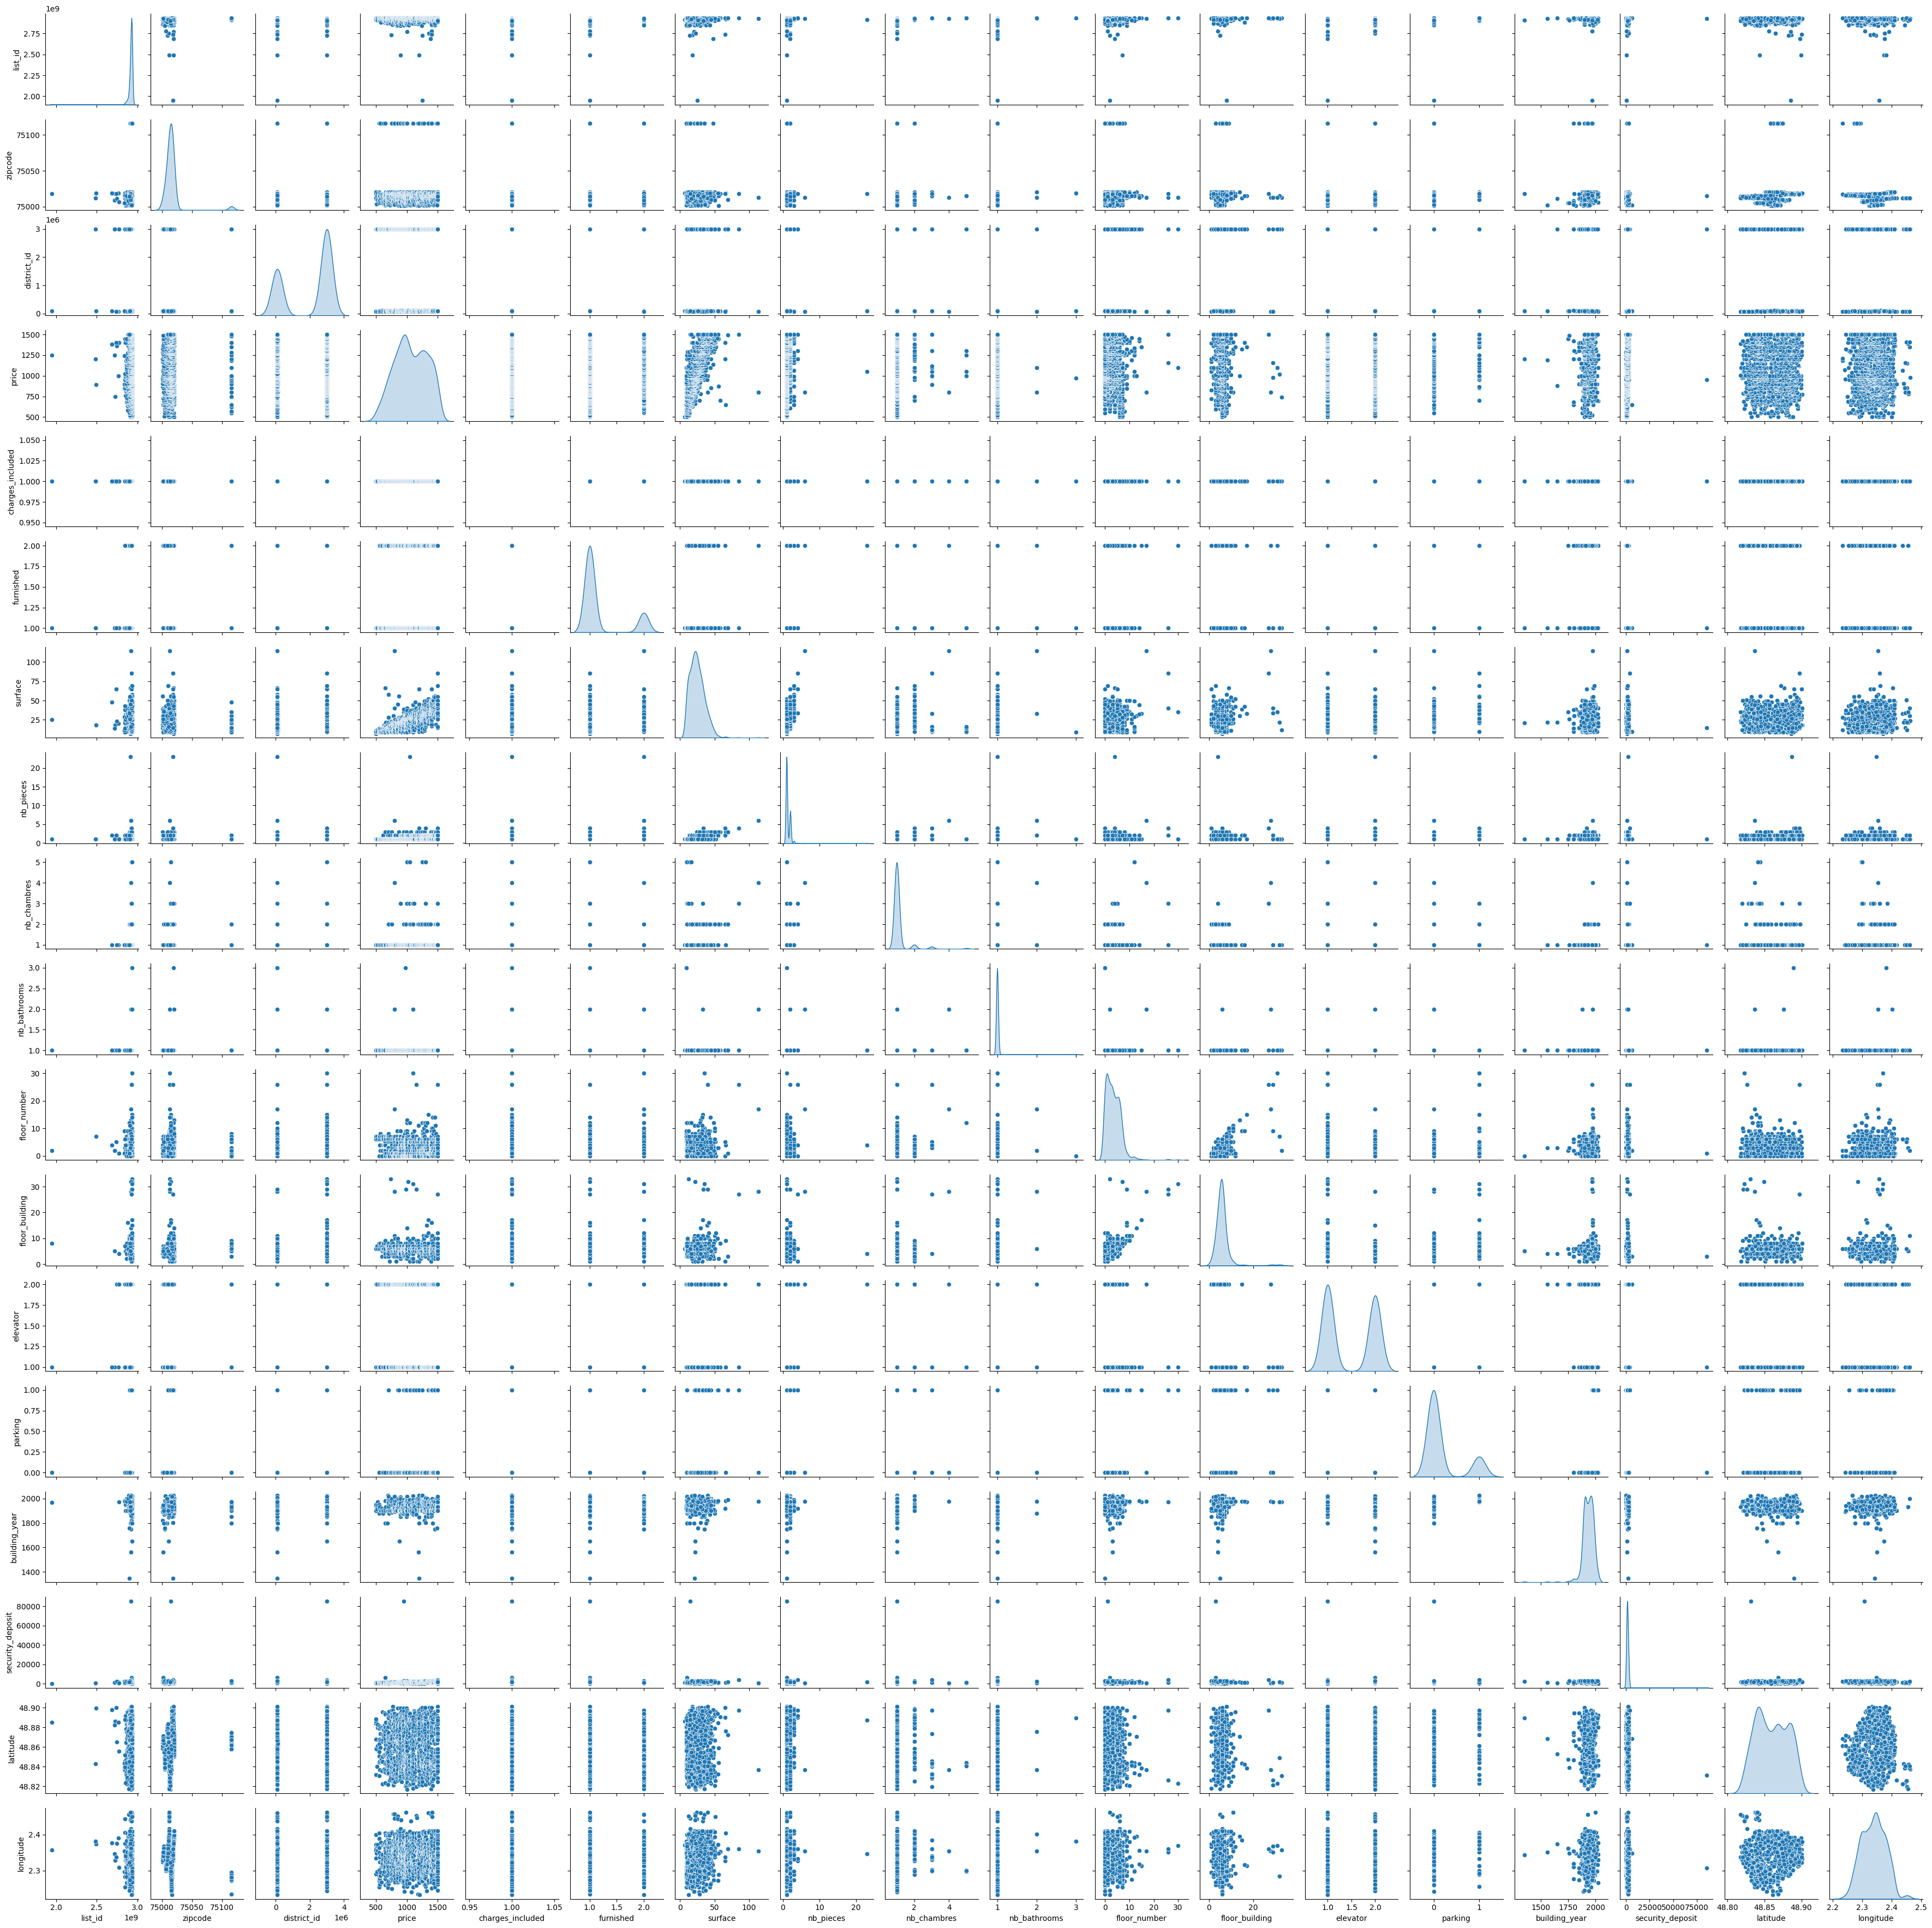

In [3]:
sns.pairplot(df_rent, diag_kind="kde", height=2)  # "kde" pour un histogramme lissé
plt.show()